In [1]:
import os, glob

import pickle
import numpy as np
import pandas as pd
import lightkurve as lk
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import patches
from tqdm.auto import tqdm

from astropy.io import fits
from astropy.table import Table

path = os.path.dirname(os.getcwd())
sys.path.append(path)
from kepler_apertures import EXBAMachine

%matplotlib inline

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
Q = 7
quarters = np.arange(5, 18)
channels = np.arange(1, 85)
channels = np.delete(channels, [4,5,6,7])
quarters, channels

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 array([ 1,  2,  3,  4,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
        73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]))

In [3]:
# Load EXBA stamp, catalo, and metadata
catalogs_dict = {}
stamps = {}
for ch in channels:
    hdu = fits.open("../data/export/%i/%02i/image_q%i_ch%02i_gaiadr3.fits.gz" % (Q, ch, Q, ch))
    hdr = hdu[0].header
    img = hdu[1].data
    cat = Table(hdu[2].data).to_pandas()
    cat["channel"] = ch
    catalogs_dict[ch] = cat
    stamps[ch] = img

In [4]:
catalogs = pd.concat(list(catalogs_dict.values()), axis=0)

In [5]:
catalogs

,designation,ra,ra_error,dec,dec_error,pmra,pmdec,parallax,parallax_error,phot_g_n_obs,...,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,col,row,clean_flag,channel
0,Gaia EDR3 2079013451168477184,299.299101,0.103400,44.058072,0.107663,-1.451094,-2.100929,0.456475,0.116516,342,...,6.890729,19.052494,36,729.497251,7.966676,17.590336,555.710142,559.404473,0,1
1,Gaia EDR3 2079013451168481024,299.295073,0.044306,44.059302,0.045731,-0.638290,-4.424571,0.197555,0.049690,343,...,12.575819,17.582455,38,2900.322111,9.570818,16.091780,557.885535,557.576878,0,1
2,Gaia EDR3 2079013451168486016,299.298548,0.243684,44.062643,0.259070,-1.310620,-1.439960,-0.272074,0.274804,326,...,6.296308,20.079683,35,274.089814,6.477266,18.653164,559.563046,560.956939,0,1
3,Gaia EDR3 2079013451168489856,299.306278,0.043455,44.064359,0.045031,-3.567227,-6.132990,0.217804,0.048621,352,...,9.175495,17.292892,39,2935.059883,8.909215,16.078854,558.679985,566.134282,0,1
4,Gaia EDR3 2079013451168492160,299.300042,0.340912,44.066050,0.400190,-2.706947,-5.245018,0.078729,0.408652,314,...,6.714252,20.574293,36,154.660736,4.487351,19.274445,561.874902,563.217006,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Gaia EDR3 2116940658091559552,280.832046,0.130297,43.564207,0.170562,-5.029646,-5.263819,0.248879,0.164276,351,...,7.095890,19.503340,34,336.794159,6.027181,18.429483,572.804373,607.267169,0,84
40,Gaia EDR3 2116941414005959168,280.822459,0.179444,43.572476,0.224170,-3.247394,2.802254,1.090562,0.221383,343,...,6.285470,20.550316,31,343.811544,5.795115,18.407095,563.032312,607.232144,0,84
41,Gaia EDR3 2116941418303108224,280.817451,0.034336,43.565279,0.039457,-4.803457,-9.743220,0.436081,0.039720,377,...,10.476716,17.119251,38,2886.547079,9.419351,16.096949,565.932934,600.540687,0,84
42,Gaia EDR3 2116941448365547520,280.830330,0.095566,43.575932,0.117598,0.330125,-7.732564,0.781627,0.114563,382,...,5.785641,19.427505,39,742.551329,10.299653,17.571080,563.933877,613.196154,0,84


In [6]:
# Load EXBA stamp, catalo, and metadata
power, frequency = [], []
bls_results = {}
clcs = {}
for ch in tqdm(channels):
    aux = pickle.load(open("../data/export/%i/%02i/bls_results_q%i_ch%02i.pkl" % (Q, ch, Q, ch), "rb"))
    power.append(aux["power"])
    frequency.append(aux["frequency"])
    clcs[ch] = aux["lc_corrected"]
    df_ = aux["table"]
    df_["channel"] = ch
    bls_results[ch] = df_
    
df = pd.concat(list(bls_results.values()), axis=0)

  0%|          | 0/80 [00:00<?, ?it/s]

In [7]:
catalogs.query("designation == 'Gaia EDR3 2077240046296834304'")

,designation,ra,ra_error,dec,dec_error,pmra,pmdec,parallax,parallax_error,phot_g_n_obs,...,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,col,row,clean_flag,channel
1,Gaia EDR3 2077240046296834304,295.859493,0.132511,42.713193,0.142235,-1.99492,-9.407661,1.030341,0.155608,410,...,8.338573,17.251686,47,4357.314376,8.755736,15.649848,555.272134,572.286012,0,17


In [7]:
def plot_stamp(flux, catalog, idx, aperture=None, ax=None, row0=0, col0=0):

    if ax is None:
        fig, ax = plt.subplots(1)
    pc = ax.pcolor(
        flux,
        shading="auto",
        norm=colors.SymLogNorm(linthresh=50, vmin=3, vmax=5000, base=10),
    )
    ax.scatter(
        catalog.col - col0 + 0.5,
        catalog.row - row0 + 0.5,
        s=20,
        facecolors="y",
        marker="o",
        edgecolors="k",
    )
    ax.scatter(
        catalog.col.iloc[idx] - col0 + 0.5,
        catalog.row.iloc[idx] - row0 + 0.5,
        s=25,
        facecolors="r",
        marker="o",
        edgecolors="r",
    )
    ax.set_xlabel("Pixels")
    ax.set_ylabel("Pixels")
    plt.colorbar(pc, label=r"Flux ($e^{-}s^{-1}$)", ax=ax)
    ax.set_aspect("equal", adjustable="box")

    if not aperture is None:
        for i in range(flux.shape[0]):
            for j in range(flux.shape[1]):
                if aperture[i, j]:
                    rect = patches.Rectangle(
                        xy=(j, i),
                        width=1,
                        height=1,
                        color="red",
                        fill=False,
                        hatch="",
                        lw=1.5,
                    )
                    ax.add_patch(rect)
        zoom = np.argwhere(aperture == True)
        ax.set_ylim(
            np.maximum(0, zoom[0, 0] - 5),
            np.minimum(zoom[-1, 0] + 5, flux.shape[0]),
        )
        ax.set_xlim(
            np.maximum(0, zoom[0, -1] - 5),
            np.minimum(zoom[-1, -1] + 5, flux.shape[1]),
        )

    return ax

ap_names = np.array(["O", 1, 2 ,3 ,4, 5, 6 ,7])
def plot_highlights(table, do_interact=False, ap_k=7):
    user = []
    for i, row, in table.iterrows():
        fname = "../data/export/%i/%02i/lc_q%i_ch%02i_%s.fits.gz" % (Q, row.channel, Q, row.channel, row.designation.replace(" ", "_"))
        try:
            lc = lk.KeplerLightCurve.read(fname)
        except FileNotFoundError:
            print("No file: ", fname)
            continue
        win = row.Aperture if row.Aperture != "O" else ""
        lc.flux = lc["flux%s" % str(win)]
        lc.flux_err = lc["flux_err%s" % str(win)]
        k = 0 if row.Aperture == "O" else int(row.Aperture)
        k = 7
        FLFRCSAP = lc.meta["FLFRSAP%s" % (k)]
        CROWDSAP = lc.meta["CRWDSAP%s" % (k)]
        ap_mask = fits.open(fname)[k + 2].data
        
        clc = clcs[row.channel][i]
        print(row)
        print(catalogs[catalogs.designation == clc.label].iloc[0])

        fig = plt.figure(figsize=(13, 7))
        sub1 = fig.add_subplot(2, 3, (1,3))
        sub1.set_title("Ch %i      " % (row.channel) + clc.label)
        lc.normalize().plot(ax=sub1, c="k", label="Raw")
        clc.normalize().plot(ax=sub1, c="tab:blue", label="Corrected")

        sub2 = fig.add_subplot(2, 3, (4,5))
        folded_clc = clc.remove_outliers(sigma_upper=5, 
                                         sigma_lower=1e10).fold(row.BLS_period)
        info = "\nP = %.4f  \nSNR = %.0f \nDepth = %.5f" % (row.BLS_period, row.BLS_period_SNR, row.BLS_depth)
        folded_clc.normalize().scatter(ax=sub2, alpha=.5, c='k', marker='.', 
                                       label=info)

        sub3 = fig.add_subplot(2, 3, 6)
        sub3.set_title("FLFRCSAP    %.3f \nCROWDSAP %.3f" % 
                       (FLFRCSAP, CROWDSAP),
                  fontsize=12,
                  bbox=dict(facecolor='white', alpha=1))
        
        
        plot_stamp(stamps[row.channel], catalogs_dict[row.channel], i, 
                   aperture=ap_mask, ax=sub3, row0=558, col0=556)
        # sub3.axes.xaxis.set_ticks([])
        # sub3.axes.yaxis.set_ticks([])

        plt.show()

        #whatis = input("What type of variable ([E]cl, [S]in, [A]ct, [F]alse): ")
        #user.append(whatis)
        print("___________________________________________________")
        # break
    return

## Filtering by Power SNR

In [8]:
high_snr = df.query("BLS_period_SNR >= 50").sort_values("BLS_period", ascending=False)
high_snr

,designation,FLFRSAP,CRWDSAP,Aperture,BLS_period,BLS_period_SNR,BLS_duration,BLS_depth,BLS_transit_time,channel
49,Gaia EDR3 2073682610777760640,0.7773,0.4472,7,29.911759,743.682183,0.030,1.045233,2.455463e+06,16
107,Gaia EDR3 2073685565725667456,0.7878,0.4255,O,29.911759,415.515543,0.030,0.228917,2.455463e+06,16
105,Gaia EDR3 2073685565715261312,0.9674,0.597,2,29.911759,576.753406,0.030,0.822433,2.455463e+06,16
104,Gaia EDR3 2073685565715238400,0.9097,0.825,2,29.911759,237.754786,0.030,3.622429,2.455463e+06,16
190,Gaia EDR3 2073685939377611904,0.5624,0.964,7,29.911759,259.153726,0.030,2.796585,2.455463e+06,16
...,...,...,...,...,...,...,...,...,...,...
70,Gaia EDR3 2128267968619535872,0.9474,0.9189,O,0.515730,101.172496,0.051,0.007596,2.455464e+06,22
63,Gaia EDR3 2077709052418221696,0.9533,0.4692,O,0.514373,102.811915,0.450,0.000105,2.455463e+06,39
32,Gaia EDR3 2131296848274153600,0.9554,0.5635,7,0.509613,94.003864,0.450,0.000141,2.455463e+06,49
92,Gaia EDR3 2101137450486311680,0.9589,0.5654,7,0.509052,492.917630,0.399,0.002117,2.455463e+06,59


## Filtering by depth, period, and duration

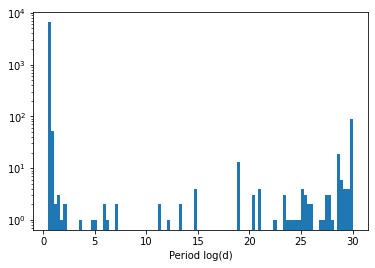

In [9]:
plt.hist(df.BLS_period, bins=100, log=True)
plt.xlabel("Period log(d)")
# plt.xscale("log")
plt.show()

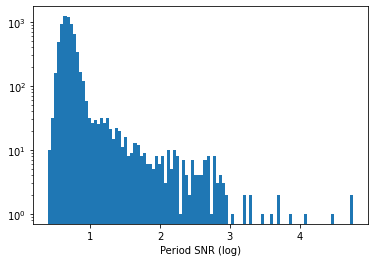

In [10]:
plt.hist(np.log10(df.BLS_period_SNR), bins=100, log=True)
plt.xlabel("Period SNR (log)")
plt.show()

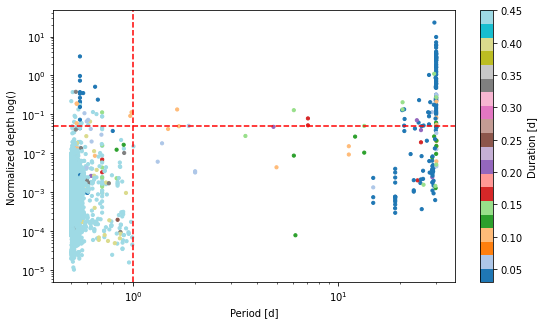

In [11]:
plt.figure(figsize=(9,5))
cbar = plt.scatter(df.BLS_period, df.BLS_depth, c=df.BLS_duration, s=10, cmap="tab20")
plt.colorbar(cbar, label="Duration [d]")
plt.axvline(1, c="r", ls="--")
plt.axhline(0.05, c="r", ls="--")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [d]")
plt.ylabel("Normalized depth log()")
plt.show()

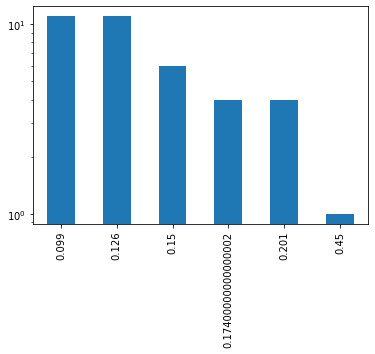

In [14]:
ax = from_depth.BLS_duration.value_counts().plot(kind="bar")
ax.set_yscale("log")

In [15]:
from_depth = df.query("BLS_depth < 0.1 and BLS_period_SNR >= 50").sort_values("channel", ascending=True)
from_depth

,designation,FLFRSAP,CRWDSAP,Aperture,BLS_period,BLS_period_SNR,BLS_duration,BLS_depth,BLS_transit_time,channel
151,Gaia EDR3 2079019812023882880,0.8464,0.6778,O,0.952989,57.271992,0.450,0.000087,2.455464e+06,1
98,Gaia EDR3 2082091568328182528,0.5712,0.9418,6,0.701882,65.795348,0.051,0.030066,2.455463e+06,4
40,Gaia EDR3 2134814735729194752,0.8921,0.9433,O,29.252109,168.796714,0.126,0.027102,2.455465e+06,9
70,Gaia EDR3 2134814941887629312,0.9108,0.9861,O,0.624345,86.084120,0.450,0.000129,2.455463e+06,9
46,Gaia EDR3 2135392352989960576,0.6732,0.628,O,0.566842,68.222448,0.450,0.000210,2.455463e+06,11
...,...,...,...,...,...,...,...,...,...,...
41,Gaia EDR3 2104125540830031872,0.9444,0.5758,7,0.566895,59.441903,0.450,0.000104,2.455464e+06,77
33,Gaia EDR3 2103827298302304128,0.7942,0.9715,O,0.533571,69.179986,0.399,0.018457,2.455464e+06,78
23,Gaia EDR3 2104814453586115328,0.9009,0.7763,7,0.595104,154.136890,0.051,0.004270,2.455464e+06,83
19,Gaia EDR3 2104814389164263168,0.7721,0.9349,7,0.595116,486.360688,0.051,0.066210,2.455463e+06,83


## Whitening the BLS periodogram

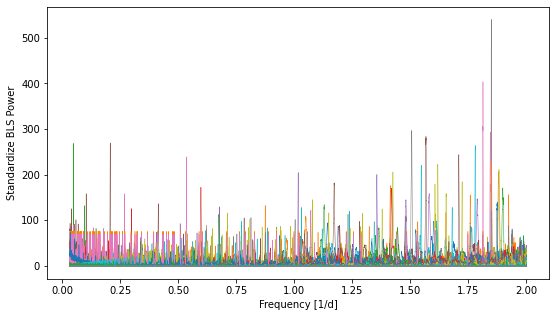

In [16]:
filtered = {}
plt.figure(figsize=(9, 5))
for ic in range(len(power)):
    pmean, pstd = power[ic].mean(), power[ic].std()
    aux = []
    for s in range(power[ic].shape[0]):
        freq = frequency[ic]
        pow = power[ic][s, :]
        pow_n = (pow - pmean) / pstd
        if np.any(pow_n > 50):
            aux.append(s)
        plt.plot(freq, pow_n, lw=0.5)
    filtered[channels[ic]] = aux

    # if ic == 10: break
        
plt.xlabel("Frequency [1/d]")
plt.ylabel("Standardize BLS Power")
plt.show()


In [17]:
from_whitening = pd.concat([bls_results[i].loc[filtered[i]] for i in channels], axis=0)
from_whitening

,designation,FLFRSAP,CRWDSAP,Aperture,BLS_period,BLS_period_SNR,BLS_duration,BLS_depth,BLS_transit_time,channel
151,Gaia EDR3 2079019812023882880,0.8464,0.6778,O,0.952989,57.271992,0.450,0.000087,2.455464e+06,1
90,Gaia EDR3 2079399173592894592,0.6193,0.4815,O,11.237101,28.150059,0.099,0.015177,2.455470e+06,2
74,Gaia EDR3 2085219885071614592,0.7608,0.8526,O,0.619855,40.739249,0.450,0.000175,2.455463e+06,3
98,Gaia EDR3 2082091568328182528,0.5712,0.9418,6,0.701882,65.795348,0.051,0.030066,2.455463e+06,4
53,Gaia EDR3 2134814804448660608,0.925,0.9135,O,0.707252,4213.413677,0.150,0.112520,2.455464e+06,9
...,...,...,...,...,...,...,...,...,...,...
42,Gaia EDR3 2103606094600498816,0.3679,0.999,7,0.551692,60.985085,0.030,0.970981,2.455464e+06,79
33,Gaia EDR3 2104467729466673792,0.9596,1.0,4,27.610713,39.283890,0.030,0.089134,2.455488e+06,80
34,Gaia EDR3 2105386925484613504,1.0,0.7852,1,0.506727,10.054567,0.450,0.000677,2.455463e+06,81
19,Gaia EDR3 2104814389164263168,0.7721,0.9349,7,0.595116,486.360688,0.051,0.066210,2.455463e+06,83


## Check unique

In [19]:
to_check = df.query("designation == 'Gaia EDR3 2073685565725669504'")
to_check

,designation,FLFRSAP,CRWDSAP,Aperture,BLS_period,BLS_period_SNR,BLS_duration,BLS_depth,BLS_transit_time,channel
108,Gaia EDR3 2073685565725669504,0.7917,0.3524,O,29.911759,618.588016,0.03,0.246653,2.455463e+06,16


# Plotting results

designation         Gaia EDR3 2073685565725669504
FLFRSAP                                    0.7917
CRWDSAP                                    0.3524
Aperture                                        O
BLS_period                              29.911759
BLS_period_SNR                         618.588016
BLS_duration                                 0.03
BLS_depth                                0.246653
BLS_transit_time                   2455463.415708
channel                                        16
Name: 108, dtype: object
designation                Gaia EDR3 2073685565725669504
ra                                            297.609586
ra_error                                        0.018326
dec                                            40.254125
dec_error                                        0.01929
pmra                                           -3.828652
pmdec                                          -6.029987
parallax                                         0.50226
parallax_error     

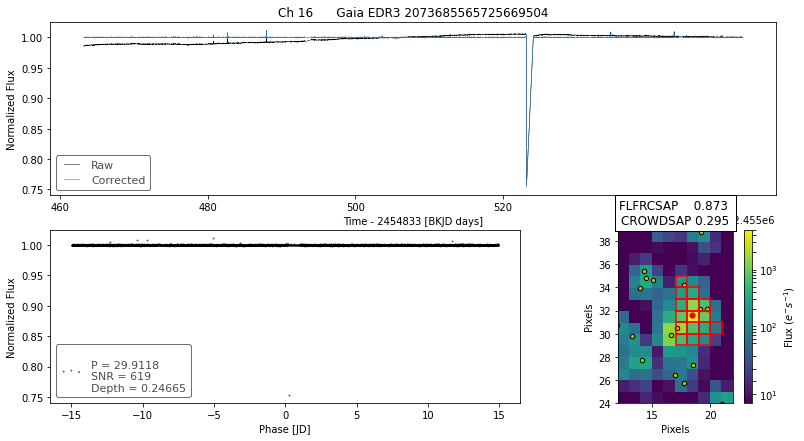

___________________________________________________


In [20]:
plot_highlights(to_check, ap_k=3)

In [39]:
highlights = ["Gaia EDR3 2076789727566520192", "Gaia EDR3 2078735858841858816", "Gaia EDR3 2082091568328182528", "Gaia EDR3 2102900959754861440", "2053614187112978176"]
highlights = ["Gaia EDR3 2077240046296834304"]

# CMD

In [42]:
full_catalog = pd.read_csv("../data/catalogs/EXBA_catalog_all_sources_reduced.csv", index_col=0)
# full_catalog.rename({"Unnamed: 0": "designation"}, inplace=True, axis=1)
full_catalog

,ra,ra_error,dec,dec_error,pmra,pmdec,parallax,parallax_error,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag
Gaia EDR3 2105384211065299328,282.026014,0.190857,44.253779,0.223919,-19.973063,-18.944105,0.589230,0.221065,381.0,299.725303,0.859953,19.495558,35.0,80.539543,6.232264,20.573519,38.0,333.183741,8.763941,18.441187
Gaia EDR3 2105384241127278208,282.006752,0.132529,44.253545,0.153231,-1.771941,-2.529980,0.150096,0.155027,400.0,445.305440,0.939770,19.065722,44.0,212.495880,8.967708,19.520166,42.0,319.307750,8.512412,18.487371
Gaia EDR3 2105384245425035392,282.014153,0.058103,44.253572,0.065566,-1.188432,-1.331190,0.649663,0.066387,406.0,1588.221303,1.434911,17.685090,42.0,579.377438,9.663919,18.431139,46.0,1368.992379,8.267079,16.906893
Gaia EDR3 2105384245425036032,282.011585,0.046780,44.256934,0.052581,-0.148561,2.350119,0.418869,0.052441,401.0,2265.134400,1.631512,17.299631,47.0,1072.065379,11.900966,17.762989,47.0,1652.775606,9.110782,16.702360
Gaia EDR3 2105384275487021696,282.017593,0.112678,44.257041,0.131294,-3.580035,-7.079613,0.074377,0.129395,399.0,582.028616,1.032191,18.775005,45.0,314.767925,9.323002,19.093567,44.0,396.873204,7.354785,18.251266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gaia EDR3 2086539951857563136,298.064847,0.352570,48.204598,0.475988,-1.418608,-6.318064,0.542188,0.458016,311.0,160.838269,0.810460,20.171392,33.0,55.953680,4.948399,20.968971,31.0,122.593378,4.727991,19.526728
Gaia EDR3 2129526011778662272,290.697294,0.135908,48.615814,0.133261,-3.101519,-4.253412,0.115126,0.141861,321.0,575.472906,1.077467,18.787304,37.0,247.301826,10.239282,19.355474,37.0,429.844118,8.300746,18.164618
Gaia EDR3 2143714973114706560,282.740530,0.021523,48.262489,0.022695,-3.188320,-5.866775,0.588440,0.023253,318.0,12823.919029,3.787749,15.417315,36.0,6671.590071,17.000673,15.777968,36.0,8757.888921,15.442165,14.891897
Gaia EDR3 2076208704382822912,295.766628,0.121251,39.445539,0.120965,-5.705135,-8.953973,0.692738,0.141725,331.0,660.024685,1.287505,18.638466,41.0,275.489884,6.929416,19.238277,40.0,673.075036,6.236069,17.677736


In [84]:
full_catalog["abs_gmag"] = (full_catalog.phot_g_mean_mag + 
                          5 * (np.log10(full_catalog.parallax/1e3) + 1))
full_catalog["abs_gmag_err"] = np.sqrt((2.5 * full_catalog.phot_g_mean_flux_error/ (full_catalog.phot_g_mean_flux * np.log(10))) ** 2 + (5 * full_catalog.parallax_error/(full_catalog.parallax * np.log(10))) ** 2)
full_catalog["distance"] = 1e3 / full_catalog.parallax
good_parallax = full_catalog.parallax > 0.01

In [85]:
# interesting = full_catalog[np.in1d(full_catalog.designation, to_check.designation.values)]
interesting = full_catalog.loc[highlights]
interesting

,ra,ra_error,dec,dec_error,pmra,pmdec,parallax,parallax_error,phot_g_n_obs,phot_g_mean_flux,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,abs_gmag,distance,abs_gmag_low,abs_gmag_upp,abs_gmag_err
Gaia EDR3 2077240046296834304,295.859493,0.132511,42.713193,0.142235,-1.99492,-9.407661,1.030341,0.155608,410.0,4345.644952,...,17.251686,47.0,4357.314376,8.755736,15.649848,6.657137,970.552522,6.301609,6.962562,0.327974


In [47]:
kep_data = Table.read("../data/catalogs/kepler_dr2_4arcsec.fits", format="fits")
kep_data["abs_gmag"] = (kep_data['phot_g_mean_mag'] + 
                         5.*(np.log10(kep_data['parallax']/1.e3) + 1.))
good_parallax_kep = kep_data['parallax'] > 0.01

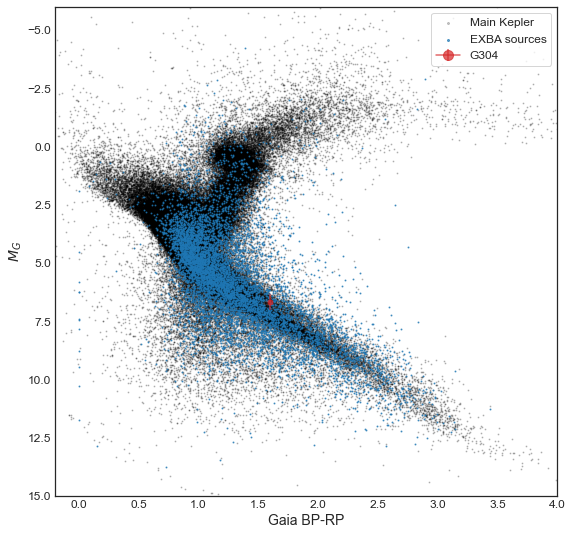

In [94]:
with plt.style.context('seaborn-white'):
    fig,ax = plt.subplots(1,1,figsize=(9,9))

    filter = (kep_data['phot_g_mean_mag'] <= 20.) & (kep_data['parallax'] > 0.01)
    ax.scatter(kep_data['bp_rp'][filter], kep_data['abs_gmag'][filter], 
               alpha=0.2, color='k', s=1, rasterized=True,
               label='Main Kepler')

    # filter2 = (kep_data['planet?'] == 'cand') & filter
    # ax.scatter(kep_data['bp_rp'][filter2], kep_data['abs_gmag'][filter2], 
    #            alpha=0.7, s=1, color='tab:red',
    #            label='Candidate host ({0})'.format(sum(filter2)))

    # EXBA
    ax.scatter(full_catalog['phot_bp_mean_mag'][good_parallax] - full_catalog['phot_rp_mean_mag'][good_parallax], 
               full_catalog['abs_gmag'][good_parallax], 
               alpha=0.7, s=1, color='tab:blue', rasterized=True,
               label='EXBA sources')

    # filter2 = (kep_data['planet?'] == 'conf') & filter
    # ax.scatter(kep_data['bp_rp'][filter2], kep_data['abs_gmag'][filter2], 
    #            alpha=0.7, s=1, color='tab:blue',
    #            label='Confirmed host ({0})'.format(sum(filter2)))

    # interesting sources from EXBA
    ax.errorbar(interesting['phot_bp_mean_mag'] - interesting['phot_rp_mean_mag'], 
                interesting['abs_gmag'], 
                yerr=interesting['abs_gmag_err'],
                marker=".",
                alpha=0.7, color='tab:red',
                label='G304',
                markersize=10)

    ax.set_xlabel('Gaia BP-RP', fontsize=14)
    ax.set_ylabel('$M_G$', fontsize=14)
    ax.set_ylim([15,-6])
    ax.set_xlim([-0.2,4])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.legend(loc='upper right', fontsize=12, markerscale=2, frameon=True)

    plt.savefig("../data/figures/paper/cmd_exba.pdf", 
            format="pdf", bbox_inches="tight")
    plt.show()